<a href="https://colab.research.google.com/github/venkateshchandle/ml/blob/main/1BM22CS325_Lab_6_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits()

digits.target

dir(digits)

digits.target_names

df = pd.DataFrame(digits.data,digits.target)
df.head()

df['target'] = digits.target
df.head(20)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('target',axis='columns'), df.target, test_size=0.3)

"""Using RBF kernel"""

from sklearn.svm import SVC
rbf_model = SVC(kernel='rbf')

len(X_train)

len(X_test)

rbf_model.fit(X_train, y_train)

rbf_model.score(X_test,y_test)

"""Using Linear kernel"""

linear_model = SVC(kernel='linear')
linear_model.fit(X_train,y_train)

linear_model.score(X_test,y_test)

0.9796296296296296

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the Iris dataset from the single CSV file
iris_data = pd.read_csv('/content/iris.csv')  # Replace 'iris.csv' with the actual file name

# Assuming the target variable column is named 'target' (or 'species')
X = iris_data.drop('species', axis=1)  # Features (all columns except 'target')
y = iris_data['species']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train SVM classifiers (RBF and Linear)
rbf_model = SVC(kernel='rbf')
rbf_model.fit(X_train, y_train)

linear_model = SVC(kernel='linear')
linear_model.fit(X_train, y_train)

# Make predictions and evaluate the models
# ... (rest of the code remains the same as before)
rbf_predictions = rbf_model.predict(X_test)
linear_predictions = linear_model.predict(X_test)

# Accuracy scores
rbf_accuracy = accuracy_score(y_test, rbf_predictions)
linear_accuracy = accuracy_score(y_test, linear_predictions)

# Confusion matrices
rbf_cm = confusion_matrix(y_test, rbf_predictions)
linear_cm = confusion_matrix(y_test, linear_predictions)

# Print the results
print("RBF Kernel:")
print("Accuracy:", rbf_accuracy)
print("Confusion Matrix:\n", rbf_cm)

print("\nLinear Kernel:")
print("Accuracy:", linear_accuracy)
print("Confusion Matrix:\n", linear_cm)

RBF Kernel:
Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Linear Kernel:
Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


<ipython-input-8-4690f60118ba>:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  letters = letters[letters.iloc[:, 1:].applymap(lambda x: str(x).strip().replace('.', '', 1).isdigit()).all(axis=1)]


SVM Classifier on Letter Recognition Dataset
Accuracy: 0.9305
Confusion Matrix:
 [[144   0   1   0   0   0   1   0   0   0   1   0   1   0   0   0   0   0
    0   0   1   0   0   0   0   0]
 [  0 143   0   5   0   1   0   0   0   0   0   0   0   0   0   0   0   4
    0   0   0   0   0   0   0   0]
 [  0   0 123   0   2   0   3   1   0   0   1   0   0   0   4   0   0   2
    0   0   1   0   0   0   0   0]
 [  0   1   0 153   0   0   0   2   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   3   1   0 130   0   5   0   0   0   0   0   0   0   0   0   1   0
    0   0   0   0   0   0   0   1]
 [  0   2   0   0   1 134   0   0   1   0   0   0   0   0   0   0   0   0
    1   1   0   0   0   0   0   0]
 [  1   0   1   4   0   0 149   0   0   0   2   0   0   0   0   0   0   2
    0   0   0   1   0   0   0   0]
 [  0   4   0   8   0   0   0 106   0   0   5   0   0   1   2   1   1  13
    0   0   2   0   0   0   1   0]
 [  0   0   0   1   0   2   0   0 134   7   0  

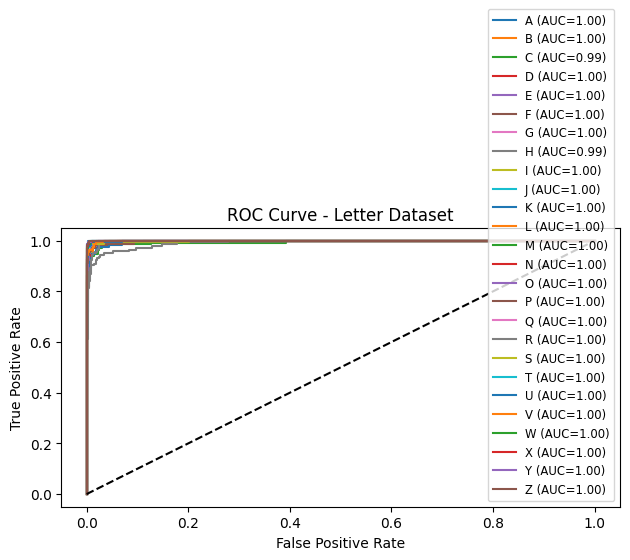

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt

# Load and clean letter dataset
letters = pd.read_csv('/content/letter-recognition.csv', header=None)

# Check for non-numeric rows, and drop them
letters = letters[letters.iloc[:, 1:].applymap(lambda x: str(x).strip().replace('.', '', 1).isdigit()).all(axis=1)]

# Convert features to float
X_letters = letters.iloc[:, 1:].astype(float)
y_letters = letters.iloc[:, 0]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_letters, y_letters, test_size=0.2, random_state=42)

# Train SVM with RBF kernel
svm_letter = SVC(kernel='rbf', probability=True)
svm_letter.fit(X_train, y_train)
y_pred = svm_letter.predict(X_test)

# Evaluate
print("SVM Classifier on Letter Recognition Dataset")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# ROC and AUC
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)
y_scores = svm_letter.predict_proba(X_test)

fpr, tpr, roc_auc = {}, {}, {}
for i in range(len(lb.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label=f"{lb.classes_[i]} (AUC={roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve - Letter Dataset")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right', fontsize='small')
plt.tight_layout()
plt.show()
